# Open Images Dataset Exploration

Goal: figure out what annotations from the `openimages` set that may be useful for the problem.

In [84]:
import csv
from io import BytesIO

import requests
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

%matplotlib inline

## Dataset explorer

### Image URLs and metadata

In [2]:
!wget https://storage.googleapis.com/openimages/2017_11/images_2017_11.tar.gz

--2018-04-21 10:37:57--  https://storage.googleapis.com/openimages/2017_11/images_2017_11.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.217.48, 2a00:1450:400b:802::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.217.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1038133015 (990M) [application/gzip]
Saving to: ‘images_2017_11.tar.gz’

images_2017_11.tar. 100%[===================>] 990.04M   122MB/s    in 8.6s    

2018-04-21 10:38:06 (115 MB/s) - ‘images_2017_11.tar.gz’ saved [1038133015/1038133015]



In [3]:
!tar -xzvf images_2017_11.tar.gz

2017_11/test/images.csv
2017_11/validation/images.csv
2017_11/train/images.csv


In [7]:
reader = csv.reader(open('2017_11/train/images.csv'))
header = next(reader)

In [8]:
print(header)

['ImageID', 'Subset', 'OriginalURL', 'OriginalLandingURL', 'License', 'AuthorProfileURL', 'Author', 'Title', 'OriginalSize', 'OriginalMD5', 'Thumbnail300KURL']


In [9]:
print(next(reader))

['000002b66c9c498e', 'train', 'https://c7.staticflickr.com/6/5499/10245691204_98dce75b5a_o.jpg', 'https://www.flickr.com/photos/43584526@N06/10245691204', 'https://creativecommons.org/licenses/by/2.0/', 'https://www.flickr.com/people/43584526@N06/', 'Mae Catherine Melchor', '#latepost #lategram #anniversary #celebration sa #Coron #surprise #love #cake #wine #flowers #chocolates #CoronEscapade #friends', '141489', 'XKWUMkcNib71Ge6Yq1/0/g==', 'https://c7.staticflickr.com/6/5499/10245691204_ace6136324_z.jpg']


In [10]:
print(next(reader))

['000002b97e5471a0', 'train', 'https://farm1.staticflickr.com/5615/15335861457_ec2be7a54e_o.jpg', 'https://www.flickr.com/photos/juggernautco/15335861457/', 'https://creativecommons.org/licenses/by/2.0/', 'https://www.flickr.com/people/juggernautco/', 'Daniel X. O&#x27;Neil', 'Downtown Detroit', '7054258', 'CyvuYIfw90WAr8y0a1PaOw==', 'https://c5.staticflickr.com/6/5615/15335861457_be5e6e8773_z.jpg']


In [14]:
r = requests.get('https://farm1.staticflickr.com/5615/15335861457_ec2be7a54e_o.jpg')

In [17]:
fh = BytesIO(r.content)

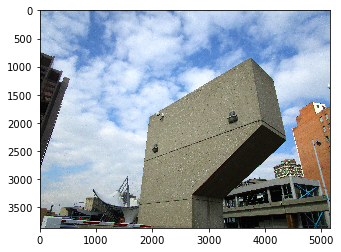

In [25]:
plt.imshow(Image.open(fh))

In [26]:
r = requests.get('https://c7.staticflickr.com/6/5499/10245691204_98dce75b5a_o.jpg')

In [27]:
fh = BytesIO(r.content)

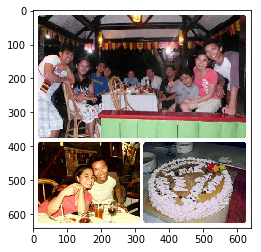

In [28]:
plt.imshow(Image.open(fh))

### Bounding box annotations

In [29]:
!wget https://storage.googleapis.com/openimages/2017_11/annotations_human_bbox_2017_11.tar.gz

--2018-04-21 10:59:31--  https://storage.googleapis.com/openimages/2017_11/annotations_human_bbox_2017_11.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.216.176, 2a00:1450:400b:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.216.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102011131 (97M) [application/gzip]
Saving to: ‘annotations_human_bbox_2017_11.tar.gz’

annotations_human_b 100%[===================>]  97.29M   105MB/s    in 0.9s    

2018-04-21 10:59:32 (105 MB/s) - ‘annotations_human_bbox_2017_11.tar.gz’ saved [102011131/102011131]



In [30]:
!tar -xzvf annotations_human_bbox_2017_11.tar.gz

2017_11/train/annotations-human-bbox.csv
2017_11/test/annotations-human-bbox.csv
2017_11/validation/annotations-human-bbox.csv


In [32]:
len(open('2017_11/train/annotations-human-bbox.csv').read())

272660734

In [33]:
len(open('2017_11/train/images.csv').read())

3294165861

In [34]:
len(open('2017_11/validation/annotations-human-bbox.csv').read())

17074036

In [35]:
reader = csv.reader(open('2017_11/train/annotations-human-bbox.csv'))

In [36]:
header = next(reader)

In [37]:
print(header)

['ImageID', 'Source', 'LabelName', 'Confidence', 'XMin', 'XMax', 'YMin', 'YMax']


In [38]:
print(next(reader))

['000002b66c9c498e', 'activemil', '/m/0284d', '1', '0.560250', '0.951487', '0.696401', '1.000000']


### Class and class descriptions

In [39]:
!wget https://storage.googleapis.com/openimages/2017_11/classes_2017_11.tar.gz

--2018-04-21 11:13:10--  https://storage.googleapis.com/openimages/2017_11/classes_2017_11.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.217.48, 2a00:1450:400b:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.217.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 303055 (296K) [application/gzip]
Saving to: ‘classes_2017_11.tar.gz’

classes_2017_11.tar 100%[===================>] 295.95K  --.-KB/s    in 0.03s   

2018-04-21 11:13:10 (9.90 MB/s) - ‘classes_2017_11.tar.gz’ saved [303055/303055]



In [40]:
!tar -xzvf classes_2017_11.tar.gz

2017_11/class-descriptions.csv
2017_11/classes-bbox-trainable.txt
2017_11/classes-bbox.txt
2017_11/classes-trainable.txt
2017_11/classes.txt


In [46]:
reader = csv.reader(open('2017_11/class-descriptions.csv'))

In [47]:
for r in reader:
    print(r)

['/m/0100nhbf', "Sprenger's tulip"]
['/m/0104x9kv', 'Vinegret']
['/m/0105jzwx', 'Dabu-dabu']
['/m/0105ld7g', 'Pistachio ice cream']
['/m/0105lxy5', 'Woku']
['/m/0105n86x', 'Pastila']
['/m/0105ts35', 'Burasa']
['/m/0108_09c', 'Summer snowflake']
['/m/01_097', 'Airmail']
['/m/010dmf', 'Isle of man tt']
['/m/010jjr', 'Amusement park']
['/m/010l12', 'Roller coaster']
['/m/010lq47b', 'Witch hat']
['/m/010ls_cv', 'Sandwich Cookies']
['/m/01_0wf', 'Common Nighthawk']
['/m/010xc', 'Aspartame']
['/m/01127', 'Air conditioning']
['/m/01_12b', 'Granny smith']
['/m/0114n', 'Atari jaguar']
['/m/01154', 'Atari lynx']
['/m/011_6p', 'Kazoo']
['/m/0117_25k', 'Saffron crocus']
['/m/01172_8x', 'Pencil skirt']
['/m/0117wzjg', 'Zenvo ST']
['/m/0117z', 'Air show']
['/m/0118b5n4', 'May day']
['/m/0118ms9c', 'Reflex camera']
['/m/0118n_9r', 'Water bottle']
['/m/0118n_nl', 'Unleavened bread']
['/m/0118q29r', 'Ides of march']
['/m/01195jk4', 'Jean short']
['/m/0119x1zy', 'Bun']
['/m/0119x27p', 'Cocker spaniel']


['/m/01gh_r', 'Mcdonnell f-101 voodoo']
['/m/01_ghv', 'Eastern Screech owl']
['/m/01gj4c', 'Pint']
['/m/01gjh7', 'Douglas b-18 bolo']
['/m/01gjrs', 'Gannet']
['/m/01gjs6', 'Booby']
['/m/01gk99', 'Freestyle walking']
['/m/01gkbw', 'Emperor penguin']
['/m/01gkx_', 'Swimwear']
['/m/01gkzr', 'Power inverter']
['/m/01gl3t', 'Roller']
['/m/01gl50', 'Angling']
['/m/01gl72', 'Skatepark']
['/m/01gllr', 'Beehive']
['/m/01gl_m', 'Mannequin']
['/m/01glyd', 'Trapeze']
['/m/01gm6', 'Bison']
['/m/01g_m6', 'Northern shoveler']
['/m/01_gm8', 'Western Screech owl']
['/m/01gmdq', 'Snowflake']
['/m/01gmp9', 'Trail mix']
['/m/01gmv2', 'Brassiere']
['/m/01gpzg', 'Flag football']
['/m/01gq53', 'Performance']
['/m/01gqfm', 'Beach volleyball']
['/m/01_gqv', 'Torque wrench']
['/m/01grkb', 'Bird of paradise']
['/m/01gs6f', 'City council']
['/m/01gt7', 'Boeing 747']
['/m/01gtwf', 'Electric eel']
['/m/01gwc2', 'Swordfish']
['/m/01gx4y', 'Photocopier']
['/m/01gxnj', 'Bratwurst']
['/m/01gxrk', 'Boombox']
['/m/01gxtf

['/m/01y0qz', 'Zinnia']
['/m/01y0zb', 'Redbud']
['/m/01y1_z', 'Geranium']
['/m/01y24v', 'Green algae']
['/m/01y28g', 'Gyro']
['/m/01y2w', 'Ciconiiformes']
['/m/01y3fy', 'Jungle']
['/m/01y3hg', 'Smoke detector']
['/m/01y3z4', 'Ford prefect']
['/m/01y4xf', 'Coriander']
['/m/01y5dx', 'Song Sparrow']
['/m/01y5hf', 'American Tree Sparrow']
['/m/01y6dg', 'Walking stick insect']
['/m/01y6tq', 'Austin allegro']
['/m/01y77', 'Cnidaria']
['/m/01y_7', 'Coyote']
['/m/01y7xt', 'Scincella']
['/m/01y8r2', 'Red flag']
['/m/01y8tr', 'Offal']
['/m/01y8xw', 'Villa']
['/m/01y8z0', 'Chipping Sparrow']
['/m/01y9k5', 'Desk']
['/m/01yby', 'Cuttlefish']
['/m/01y_c6', 'G-string']
['/m/01yc83', 'Hand tool']
['/m/01yct6', 'Princess']
['/m/01ycvc', 'Sea ice']
['/m/01ydl', 'Cane toad']
['/m/01ydy2', 'Ford aspire']
['/m/01ydzk', 'Grocer']
['/m/01yf2', 'Croquet']
['/m/01yfj', 'Curling']
['/m/01y_g4', 'Austin-healey sprite']
['/m/01yg7d', 'Sarangi']
['/m/01yg9g', 'Lawn mower']
['/m/01ygjb', 'Lacerta']
['/m/01ygpt', 'H

['/m/02msn_', 'Marmoset']
['/m/02m_t0', 'Aston martin db9']
['/m/02mtjy', 'Citroën traction avant']
['/m/02mtq_', 'Gun dog']
['/m/02mtw0', 'Mehndi']
['/m/02mtys', 'Bmw 3 series']
['/m/02mv4d', 'Aston martin vanquish']
['/m/02mvfg', 'Hdmi']
['/m/02mwm5', 'Police dog']
['/m/02mwvg', 'Swift fox']
['/m/02mwzg', 'Plateau']
['/m/02mxl6', 'Amaretto']
['/m/02mybp', 'Buick riviera']
['/m/02myp8', 'Stargazy pie']
['/m/02mysf', 'Cadillac coupe de ville']
['/m/02mzbr', 'Buick electra']
['/m/02mzl', 'Ethiopian food']
['/m/02mzpl', 'Aulos']
['/m/02n106', 'Landing craft']
['/m/02n1k', 'Erosion']
['/m/02n1nf', 'Pontiac grand prix']
['/m/02n2b3', 'Audi a6']
['/m/02n3c4', 'Ford explorer']
['/m/02n3dt', 'Hot chocolate']
['/m/02n44t', 'Apple cider']
['/m/02n47_', 'Tambura']
['/m/02_n4n', 'Potty training']
['/m/02n4pm', 'Oldsmobile 98']
['/m/02n4tj', 'Oldsmobile 88']
['/m/02n4yy', 'Pontiac catalina']
['/m/02n55c', 'Pontiac bonneville']
['/m/02n5q4', 'Lincoln town car']
['/m/02_n5s', 'Coltsfoot']
['/m/02n62

['/m/02wvcj0', 'Penalty card']
['/m/02wv_k', 'Ball valve']
['/m/02wvljt', 'Subaru r-2']
['/m/02wvn_6', 'Ricciarelli']
['/m/02wvphq', 'Belgian passport']
['/m/02wvpkf', 'Danish passport']
['/m/02wvpn5', 'Swiss passport']
['/m/02wvqj', 'Volvo s80']
['/m/02wvt16', 'Common Map Turtle']
['/m/02wvth', 'Fiat 500 "topolino"']
['/m/02wvxp2', 'Austrian passport']
['/m/02w_wbz', 'Lower Keys Marsh Rabbit']
['/m/02wwg0_', 'Lantana camara']
['/m/02wwhtl', 'Common chameleon']
['/m/02wwn3', 'Hillman avenger']
['/m/02wwt_1', 'Chilean passport']
['/m/02wwv13', 'Cuban passport/']
['/m/02wwzm8', 'Okazu']
['/m/02wx20z', 'Caisa']
['/m/02wx54_', 'Temple fade']
['/m/02w_xjs', 'Dead blow hammer']
['/m/02wxmqm', 'Nissan gtp zx-turbo']
['/m/02w_y51', 'Accelerade']
['/m/02wy5kb', 'Snapper']
['/m/02wydh', 'Ferrari berlinetta boxer']
['/m/02wylfb', 'Banjo guitar']
['/m/02wylsp', 'Baglamas']
['/m/02wyr0', 'Enzo ferrari']
['/m/02wyt89', 'Terrapin']
['/m/02wytds', 'Audi le mans quattro']
['/m/02wz0x0', 'Vinaigrette']


['/m/03dn1m', 'Renault scénic']
['/m/03dncm', 'Crinum']
['/m/03dndc', 'Fiat stilo']
['/m/03dnpn', 'Honeysuckle']
['/m/03dnxh', 'White bread']
['/m/03dnzn', 'Bathtub']
['/m/03dqm0', 'Poison dart frog']
['/m/03dqpc', 'Card scraper']
['/m/03dqt', 'Grey whale']
['/m/03drls', 'Ylang-ylang']
['/m/03drm6', 'Maid']
['/m/03dryc', 'Go-go dancing']
['/m/03drzh', 'Vernors']
['/m/03dszr', 'Akbash dog']
['/m/03dtr', 'Geyser']
['/m/03dvmm', 'Mclaren automotive']
['/m/03dvq6', 'Faggot']
['/m/03dvs9', 'Rattlesnake']
['/m/03dvsn', 'Ground rattlesnake']
['/m/03dy6r', 'Blintz']
['/m/03dyz', 'Gin and tonic']
['/m/03dz79', 'Lotus cortina']
['/m/03dzf4', 'Kobe beef']
['/m/03dzf', 'Gimlet']
['/m/03dzlg', 'Burmese python']
['/m/03f03m', 'Tetherball']
['/m/03f0h4', 'Roman temple']
['/m/03f249', 'Maglev']
['/m/03f2m2', 'Duvet']
['/m/03f34_', 'Ancient greek temple']
['/m/03f35r', 'Wildflower']
['/m/03f476', 'Veggie burger']
['/m/03f52z', 'Eyelash']
['/m/03f5jh', 'Dog crossbreeds']
['/m/03f5mt', 'Keytar']
['/m/03f

['/m/045lcs', 'Chien français blanc et noir']
['/m/045m16', 'Mill']
['/m/045_n7', 'Bell x-22']
['/m/045nmg', 'Nissan prairie']
['/m/045p8f9', 'Suzuki reno']
['/m/045pmb', 'Yenko camaro']
['/m/045q_4', 'Ferrari f355']
['/m/045qt3', 'Dahi vada']
['/m/045rjd', 'Frill-necked lizard']
['/m/045rjzg', 'Maserati 228']
['/m/045s2g', 'High five']
['/m/04_5sg', 'Hill']
['/m/045sm4', 'Deep-submergence vehicle']
['/m/045sr1', 'Mazda navajo']
['/m/045t93', 'Blue-tongued skink']
['/m/045tty', 'Japanese chin']
['/m/045v5x', 'Calochortus']
['/m/045_wd', 'Ford territory']
['/m/045wmml', 'Maserati spyder']
['/m/045yy4', 'Vauxhall carlton']
['/m/046_0n', 'Ford model n']
['/m/0461ch', 'Orangery']
['/m/0462dy3', 'Sikorsky s-52']
['/m/0462k2c', 'Packard panther']
['/m/0462w2b', 'Maniçoba']
['/m/0462w3c', 'Guk']
['/m/0462z4', 'Holden kingswood']
['/m/0462zh', 'Street football']
['/m/04630sc', 'Kite skating']
['/m/04638wp', 'Jatjuk']
['/m/0463cq4', 'Crying']
['/m/0463lgf', 'Peugeot quadrilette']
['/m/0463nlw',

['/m/058ksc', 'Pork belly']
['/m/058kvx', 'Intercom']
['/m/058l0s', 'Ice hockey equipment']
['/m/05_8m', 'Pearl']
['/m/058myx', 'Clipper']
['/m/058nbh', 'Packard clipper']
['/m/058p2d', 'Opel meriva']
['/m/058pq1', 'Seat córdoba']
['/m/058qzx', 'Kitchen knife']
['/m/058r9z', 'Rolling pin']
['/m/058sp2', 'Elaeocarpaceae']
['/m/058sq5', 'Tanacetum parthenium']
['/m/058sv', 'Magazine']
['/m/058tz6', 'Ruan']
['/m/058v0n', 'Lineman']
['/m/058v35', 'Alfa romeo brera']
['/m/058v3z', 'Alfa romeo 159']
['/m/058v4s', 'Alfa romeo kamal']
['/m/058v5', 'Microcontroller']
['/m/058v7l', 'Porsche cayman']
['/m/058wp', 'Mecca']
['/m/058x3r', 'Citroën méhari']
['/m/058x8r', 'Amc spirit']
['/m/058xcc', 'Fire sprinkler']
['/m/058zpf', 'Research vessel']
['/m/058zvc', 'Duckpin bowling']
['/m/05912f', 'White shepherd']
['/m/0591sb', 'Windjammer']
['/m/0592j2', 'Tripe soup']
['/m/0594sx', 'Koottu']
['/m/0594v', 'Motel']
['/m/059_52', 'Laminate trimmer']
['/m/059__59', 'Common peony']
['/m/0595j5', 'Cinnamon'

['/m/06bqsw', 'Indian jujube']
['/m/06br1f', 'Colcannon']
['/m/06br8', 'Rugby union']
['/m/06bs13', 'Domestic rabbit']
['/m/06bs5s', 'Surface effect ship']
['/m/06bt6', 'Reptile']
['/m/06bvp', 'Religion']
['/m/06bw0b', 'Mitsubishi pajero']
['/m/06bxc', 'Rapping']
['/m/06b_y2', 'Fideo']
['/m/06by7v', 'Glacial lake']
['/m/06by85', 'Volvo 480']
['/m/06bz3', 'Radio']
['/m/06c0nf', 'Grunion']
['/m/06c267', 'Maserati ghibli']
['/m/06c33q', 'Pouteria campechiana']
['/m/06c4kh', 'Rebate plane']
['/m/06c4_m', 'Baseball park']
['/m/06c54', 'Rifle']
['/m/06c5rq', 'Grand bleu de gascogne']
['/m/06c60c', 'Matcha']
['/m/06c7cv', 'Kneeling']
['/m/06c7f7', 'Lipstick']
['/m/06c9v1', 'French dressing']
['/m/06cd7', 'Rosemary']
['/m/06c_dx', 'Bear claw']
['/m/06cf7', 'Rose order']
['/m/06cgj7', 'Brook salamander']
['/m/06cgss', 'Sanxian']
['/m/06chgg', 'Jaguar mark ix']
['/m/06chkr', 'Francesinha']
['/m/06ckl7', 'Sarinda']
['/m/06cmpk', 'Cycle polo']
['/m/06cnp', 'River']
['/m/06cpxj', 'Berbere']
['/m/06

['/m/083ch4', 'Japanese amberjack']
['/m/083jv', 'White']
['/m/083kb', 'Weapon']
['/m/083kv', 'Wire']
['/m/083l19', 'Mattar paneer']
['/m/083mg', 'Walking']
['/m/083p6f', 'Supermini']
['/m/083pnc', 'Blowout']
['/m/083qqcx', 'Tortiglioni']
['/m/083r5c', 'Venturi fétish']
['/m/083s2', 'Wing']
['/m/083tpm', 'Toma cheese']
['/m/083ts1', 'Polyphemus moth']
['/m/083tx9', 'Bagna càuda']
['/m/083vt', 'Wood']
['/m/083wq', 'Wheel']
['/m/083ydh', 'Eagle medallion']
['/m/08439z', 'Window screen']
['/m/0843s5', 'Mitsubishi i']
['/m/0846kq', 'Scrubs']
['/m/0846mg', 'Stack cake']
['/m/0847zd', 'Sencha']
['/m/08486', 'Weed']
['/m/0848dn', 'Jinghu']
['/m/0848fb', 'Chilopsis']
['/m/0848hd', 'Sofrito']
['/m/0849l', 'Weightlifting']
['/m/084b1v', 'Ainu cuisine']
['/m/084bl', 'Wakeboarding']
['/m/084cz', 'Wasabi']
['/m/084fnj', 'Heat gun']
['/m/084gkq', 'Malpighia']
['/m/084gn8', 'Acerola family']
['/m/084hf', 'Worm']
['/m/084ml3', 'Whiptail lizard']
['/m/084n_5', 'Bourbon ball']
['/m/084nq3', 'Caesalpinia

['/m/0bh2pb', 'Henry j']
['/m/0bh41s', 'Feist']
['/m/0bh574', 'Đàn nhị']
['/m/0bh59y', 'Lincoln custom']
['/m/0bh6t6c', 'Rescuer']
['/m/0bh7np8', 'West African cuisine']
['/m/0bh82pz', 'Water smartweed']
['/m/0bh8hyx', 'Bed skirt']
['/m/0bh8k2g', 'Tambouras']
['/m/0bh8mlz', 'Alsophila pometaria']
['/m/0bh_8m', 'Maserati boomerang']
['/m/0bh8wvq', 'Iris japonica']
['/m/0bh99y_', 'Electric bicycle']
['/m/0bh9flk', 'Tablet computer']
['/m/0bh9nt6', 'Pholisora catullus']
['/m/0bh9q8s', 'Delicacy']
['/m/0bh9xgb', 'Iso rivolta ir 300']
['/m/0bhb04', 'Pecel']
['/m/0bhb1h8', 'Money bag']
['/m/0bhbtb5', 'Medicine chest']
['/m/0bhc9zt', 'Maniola']
['/m/0bhcrf', 'Ngo hiang']
['/m/0bhcs3', 'Jello salad']
['/m/0bhfcw', 'Chwee kueh']
['/m/0bhgp_', 'Lincoln capri']
['/m/0bhj7w', 'Claypot chicken rice']
['/m/0b_hjw', 'Yamaha p-120']
['/m/0bhl4z', 'Pannekoek']
['/m/0bhmh', 'Telephony']
['/m/0bhn86', 'Siopao']
['/m/0bhnm', 'Uninterruptible power supply']
['/m/0bht5d', 'White sweet clover']
['/m/0bhtpc',

['/m/0dshv_', 'Padel']
['/m/0dshxs', 'Canjica']
['/m/0dsjfd', 'Dornier do 31']
['/m/0dsmxd', 'Moskovskaya']
['/m/0dsnmx', 'Power hockey']
['/m/0d_snrp', 'Practice chanter']
['/m/0dszd7', 'Biribol']
['/m/0dt0yv', 'Jachnun']
['/m/0dt23n', 'Borassus flabellifer']
['/m/0dt3t', 'Fork']
['/m/0dt455', 'Mongolian food']
['/m/0dt9xj', 'Windflower']
['/m/0dtc__', 'Peugeot 908 hdi fap']
['/m/0dtf_v', 'Lesser earless lizard']
['/m/0dthp', 'Rosh Hashana']
['/m/0dtln', 'Lamp']
['/m/0dtn7s', 'Map turtle']
['/m/0d_t_q', 'Holden vz commodore']
['/m/0dtrfw', 'Avena']
['/m/0dtv1f', 'Peugeot 905']
['/m/0d_tyn', 'Cheonggukjang']
['/m/0dv0b7', 'Summer squash']
['/m/0dv27g', 'Blueberry pie']
['/m/0dv2dr', 'Ladder golf']
['/m/0dv34', 'Baking']
['/m/0dv3j', 'Boiling']
['/m/0dv3zf', 'Game boy']
['/m/0dv5r', 'Camera']
['/m/0dv6r', 'Squash']
['/m/0dv77', 'Squash']
['/m/0dv8l3', 'Slush']
['/m/0dv9c', 'Racket']
['/m/0dvg9', 'Ancient roman architecture']
['/m/0dvh9', 'Classical architecture']
['/m/0dvh_', 'Morris da

['/m/0h3rf2j', 'Corpse reviver']
['/m/0h3ry0', 'Ferrari 250 tr 61 spyder fantuzzi']
['/m/0h3s6b', 'Tofurky']
['/m/0h3tll', 'Renault midlum']
['/m/0h3wfg4', 'Alphasphere']
['/m/0h3zkc', 'Leptosiphon']
['/m/0h42m', 'Match']
['/m/0h4c9', 'Maserati']
['/m/0h4fg5', 'Wide Sawfish']
['/m/0h4hj7', 'Giant carp']
['/m/0h4sv', 'Selkirk rex']
['/m/0h4wls', 'Western riding']
['/m/0h4z9s', 'Western Pygmy Blue']
['/m/0h4zp18', 'Ferrari 550 maranello']
['/m/0h50lv', 'Jack rose']
['/m/0h51wtr', 'Marocchino']
['/m/0h52485', 'Grammia virgo']
['/m/0h530tf', 'Bread soup']
['/m/0h539z7', 'First day of school']
['/m/0h53n_r', 'Crepidium']
['/m/0h53pz_', 'Rain pants']
['/m/0h548rj', 'Floodlight']
['/m/0h54qs', 'Holden caprice']
['/m/0h5_4x9', 'Citroën']
['/m/0h55b', 'Junk food']
['/m/0h55s', 'Caramel']
['/m/0h55sgb', 'Slender sharksucker']
['/m/0h56055', 'Eurasian golden oriole']
['/m/0h5617w', 'Pinalia']
['/m/0h56l', 'Corn syrup']
['/m/0h56lrs', 'Steckerlfisch']
['/m/0h59_', 'Ice skate']
['/m/0h5fb', 'Sphynx

['/m/0vg8', 'Airline']
['/m/0vj4g', 'Heel']
['/m/0vjs6', 'Detective']
['/m/0v_k3hv', 'Rabbit meat']
['/m/0vllx', 'Barn']
['/m/0vlys', 'Tower block']
['/m/0vphbfj', 'Xbox one']
['/m/0_vpmtw', 'Dark chocolate']
['/m/0vpsd3h', 'Television presenter']
['/m/0vpw3qb', 'Underwater orienteering']
['/m/0vpwh8y', 'Fire lily']
['/m/0vxfrdn', 'Pan dulce']
['/m/0vzscg9', 'Dia dos namorados']
['/m/0w0d', 'Archery']
['/m/0w10g1_', 'Buick encore']
['/m/0w1fg0y', 'Cingulata']
['/m/0w2h', 'Arbor day']
['/m/0w7c', 'Acting']
['/m/0w7mg89', 'Goat racing']
['/m/0w7q2wc', 'Dame blanche']
['/m/0w7qcy1', 'Mountain river']
['/m/0w7s', 'Aerospace engineering']
['/m/0w88xth', 'Multimedia software']
['/m/0wbj9rm', 'Kelly bag']
['/m/0wd_1qy', 'Zefir']
['/m/0wdnwpm', 'Rugby boot']
['/m/0wdt60w', 'Rugby ball']
['/m/0wf0kbf', 'Wave']
['/m/0wfd3', 'Columbus day']
['/m/0wfrc8w', 'Animal sports']
['/m/0wgq355', 'Kite sports']
['/m/0wgq69z', 'Precision sports']
['/m/0wgq6rw', 'Weapon combat sports']
['/m/0wgq6y7', 'Striki

Basically, I can see 4 useful categories:

  * `Advertising`
  * `Vintage advertisement`
  * `Display advertising`
  * `Online advertising`
  * `Billboard`
  
I'm sure there's more, but that's a good start. I'll grab all annotations for these categories first 

In [53]:
class_of_interest = set()

desc_reader = csv.reader(open('2017_11/class-descriptions.csv'))
for cls_id, cls_desc in desc_reader:
    if cls_desc.lower() in (
        'advertising', 'vintage advertisement', 'display advertising',
        'online advertising', 'billboard'
    ):
        class_of_interest.add(cls_id)

In [54]:
len(class_of_interest) == 5

True

## Filter dataset

### Get useful annotations

In [62]:
bb_reader = csv.reader(open('2017_11/train/annotations-human-bbox.csv'))
header = next(bb_reader)

advertising_annotations = []
advertising_img_ids = set()

for annotation in bb_reader:
    img_id, label_name = annotation[0], annotation[2]
    if label_name in class_of_interest:
        advertising_annotations.append(annotation)
        advertising_img_ids.add(img_id)

In [63]:
len(advertising_annotations)

2967

In [64]:
advertising_annotations[0]

['00013ec42a6a93a5',
 'verification',
 '/m/01knjb',
 '1',
 '0.064062',
 '0.428125',
 '0.066667',
 '0.250000']

In [65]:
img_reader = csv.reader(open('2017_11/train/images.csv'))
print(next(img_reader))

['ImageID', 'Subset', 'OriginalURL', 'OriginalLandingURL', 'License', 'AuthorProfileURL', 'Author', 'Title', 'OriginalSize', 'OriginalMD5', 'Thumbnail300KURL']


In [66]:
advertising_imgs = []

for img in img_reader:
    img_id = img[0]
    if img_id in advertising_img_ids:
        advertising_imgs.append(img)

In [67]:
len(advertising_imgs)

2733

In [68]:
first_img = advertising_imgs[0]

In [69]:
first_img

['00013ec42a6a93a5',
 'train',
 'https://farm6.staticflickr.com/70/202126109_ce9f99922b_o.jpg',
 'https://www.flickr.com/photos/tyger_lyllie/202126109',
 'https://creativecommons.org/licenses/by/2.0/',
 'https://www.flickr.com/people/tyger_lyllie/',
 'Kat',
 'at the ballpark3',
 '74321',
 '+q1wUsf21jGNmH/z5D0A0w==',
 'https://c3.staticflickr.com/1/70/202126109_ce9f99922b_z.jpg?zz=1']

In [70]:
r = requests.get(first_img[2])

In [71]:
fh = BytesIO(r.content)

In [85]:
img = Image.open(fh)

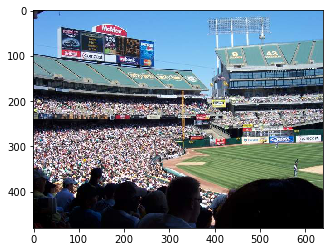

In [86]:
plt.imshow(img)

In [82]:
first_img_annotations = [a for a in advertising_annotations if a[0] == first_img[0]]

In [83]:
first_img_annotations

[['00013ec42a6a93a5',
  'verification',
  '/m/01knjb',
  '1',
  '0.064062',
  '0.428125',
  '0.066667',
  '0.250000'],
 ['00013ec42a6a93a5',
  'xclick',
  '/m/01knjb',
  '1',
  '0.097027',
  '0.424100',
  '0.081420',
  '0.225470']]

Next to do: display a bounding box over the image.

In [137]:
img = Image.open(fh)

draw = ImageDraw.Draw(img)

x_min, x_max, y_min, y_max = [float(a) for a in first_img_annotations[0][-4:]]
draw.rectangle([x_min * img.size[0], y_min * img.size[1], x_max * img.size[0], y_max * img.size[1]], outline='green')

x_min, x_max, y_min, y_max = [float(a) for a in first_img_annotations[1][-4:]]
draw.rectangle([x_min * img.size[0], y_min * img.size[1], x_max * img.size[0], y_max * img.size[1]], outline='red')

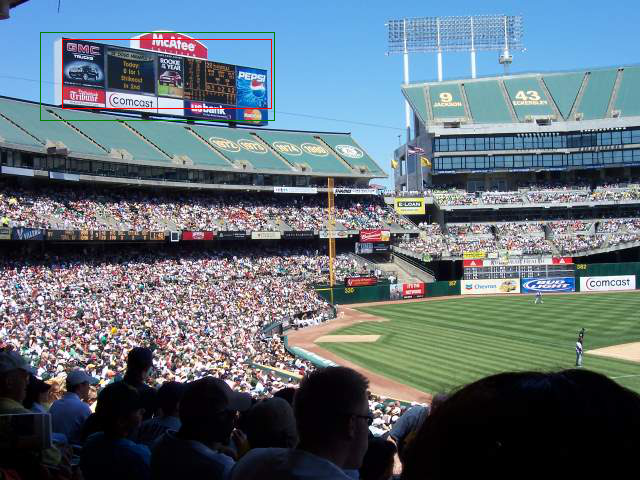

In [138]:
img

In [139]:
img.size

(640, 480)